In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression

In [3]:
# data = pd.read_csv("/ssd/projetos/linear_regression_rs/data/winequality-red.csv", delimiter=";")
# X, y = data.iloc[:, :-1].values, data.iloc[:, -1].values

In [180]:
X, y = make_regression(n_samples=3000, n_features=1, noise=45)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, random_state=42)

In [181]:
n_samples = 60
X_train, X_test, y_train, y_test = X[:3000-n_samples], X[3000-n_samples:], y[:3000-n_samples], y[3000-n_samples:]

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

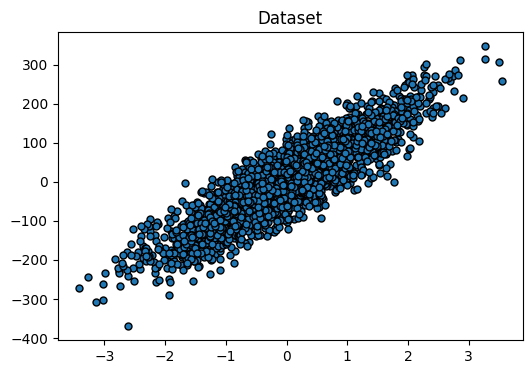

In [182]:
# plt.figure(figsize=(9, 4))
# plt.title("One informative feature, one cluster per class")
# plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')
# plt.show()
plt.figure(figsize=(6, 4))
plt.title("Dataset")
plt.scatter(X[:, 0], y, marker='o', s=25, edgecolor='k')
plt.show()

In [183]:
# scaler_x = StandardScaler()
# scaler_x.fit(X_train)
# X_train = scaler_x.transform(X_train)
# X_test = scaler_x.transform(X_test)

In [184]:
# scaler_y = MinMaxScaler()
# scaler_y.fit(y_train)
# y_train = scaler_y.transform(y_train)
# y_test = scaler_y.transform(y_test)

In [185]:
lr = 0.0001
W = np.random.randn(1, 1) * np.sqrt(2. / (X_train.shape[1] + 1))
B = np.ones((1, 1))

for _ in range(150):
    y_pred = np.dot(X_train, W) + B
    error = y_pred - y_train
    grad = np.dot(X_train.T, error)
    W -= lr * grad
    B -= np.sum(lr * error)

print(f"{W[0][0]} * x + {B[0][0]}")

85.69072366505839 * x + 0.6395358590119071


In [186]:
A = np.c_[X_train, np.ones(len(X_train))]
reg = LinearRegression().fit(A, y_train)
e_sk_value = (reg.coef_ * A) + reg.intercept_
print(f"{reg.coef_[0][0]} * x + {reg.intercept_[0]}")

85.69072366505841 * x + 0.6395358590119059


In [187]:
pd.DataFrame(np.c_[X, y], columns=["x", "y"]).to_csv("/ssd/projetos/linear_regression_rs/data/simple_regression.csv", index=False)